In [1]:
%matplotlib inline
import pyne
from decay_compare import *
from pyne import data
from pyne import rxname
import tables as tb

/home/scopatz/miniconda3/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/home/scopatz/miniconda3/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
%%time
nucs = cram.NUCS
n = 32
nucs = cram.NUCS[100*n:100*(n+1)]
#nucs = cram.NUCS[:100*(n+1)]
# degenerate cases
#nucs = ['Lu153', 'Tm149', 'Pt183', 'Os179', 'Ir172', 'Re168']
#nucs = ['Ir172']
# run custom
#nucs = ['Ra233', 'Ac225']
batemans, crammeds, diagexps = run_nuclides(nucs=nucs, verbose=True)

Running nuc Cm236
Running nuc Cm237
Running nuc Cm238
Running nuc Cm239
Running nuc Cm240
Running nuc Cm241
Running nuc Cm242
Running nuc Cm243
Running nuc Cm244
Running nuc Cm245
Running nuc Cm246
Running nuc Cm247
Running nuc Cm248
Running nuc Cm249
Running nuc Cm250
Running nuc Cm251
Running nuc Cm252
Running nuc Bk234
Running nuc Bk235
Running nuc Bk236
Running nuc Bk237
Running nuc Bk238
Running nuc Bk239
Running nuc Bk240
Running nuc Bk241
Running nuc Bk242
Running nuc Bk243
Running nuc Bk244
Running nuc Bk245
Running nuc Bk246
Running nuc Bk247
Running nuc Bk248
Running nuc Bk249
Running nuc Bk250
Running nuc Bk251
Running nuc Bk252
Running nuc Bk253
Running nuc Bk254
Running nuc Cf237
Running nuc Cf238
Running nuc Cf239
Running nuc Cf240
Running nuc Cf241
Running nuc Cf242
Running nuc Cf243
Running nuc Cf244
Running nuc Cf245
Running nuc Cf246
Running nuc Cf247
Running nuc Cf248
Running nuc Cf249
Running nuc Cf250
Running nuc Cf251
Running nuc Cf252
Running nuc Cf253
Running nu

In [3]:
NNUCS = len(crammeds)

In [4]:
b = np.zeros((NTIMES, NNUCS), dtype=float)
c = np.zeros((NTIMES, NNUCS), dtype=float)
d = np.zeros((NTIMES, NNUCS), dtype=float)
for n, nuc in enumerate(nucs):
    b[:, n] = batemans[nuc][nuc]
    c[:, n] = crammeds[nuc][nuc]
    d[:, n] = diagexps[nuc][nuc]

In [5]:
diagdiff = np.abs(d - c)
mu_diagdiff = diagdiff.mean(axis=1)
sigma_diagdiff = diagdiff.std(axis=1)

In [6]:
sigma_diagdiff

array([  0.000000000000000000e+00,   4.725221720926687902e-15,
         4.592180540067138677e-15,   3.717235947086826184e-15,
         4.877536131439754652e-15,   3.843140306762198817e-15,
         3.482090206666985079e-15,   3.422817508005309909e-15,
         4.703564151702640593e-15,   3.854716215896770313e-15,
         4.184860731432654029e-15,   3.597377588816103322e-15,
         3.147662470225519065e-15,   3.436042160724256474e-15,
         2.774349985490921760e-15,   2.839262366447556882e-15,
         3.092376530115875191e-15,   3.081130922841398358e-15,
         2.379999561439662967e-15,   2.348270703260908473e-15,
         2.197528400645408450e-15,   2.182595282803199150e-15,
         2.102318550370774956e-15,   1.651452223728427650e-15,
         1.635502729515960227e-15,   1.942115806375020508e-15,
         1.508394205573692462e-15,   1.468668422979932077e-15])

# Difference plot for all nuclides

The red line is the mean difference with $1\sigma$ error bars

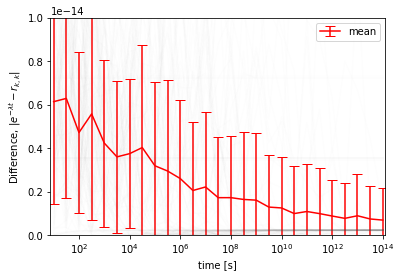

In [7]:
plt.plot(TIMES[1:], diagdiff[1:, :], color='gray', alpha=0.01)
plt.errorbar(TIMES[1:], mu_diagdiff[1:], yerr=sigma_diagdiff[1:], color='red', capsize=5, label='mean')
plt.axis([TIMES[1]*0.75, TIMES[-1]*1.25, 0.0, 1e-14])
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('time [s]')
plt.ylabel('Difference, $\\left|e^{-\\lambda t} - r_{k,k}\\right|$')
plt.legend(loc=0)

# Bateman Comparison

In [8]:
def bateman_diff_plot(nuc, batemans, crammeds):
    try:
        bateman = batemans[nuc]
        crammed = crammeds[nuc]
    except KeyError:
        print('Nuclide not in data!')
        return
    diff = diff_nuclide(bateman, crammed, abs=True)
    d = np.zeros((NTIMES, len(diff)), dtype=float)
    for i, (n, arr) in enumerate(diff.items()):
        if data.fpyield(nuc, n) > 0:
            print('skipping', n)
            continue
        plt.plot(TIMES, arr, label=n)
        d[:,i] = arr
    mu = d.mean(axis=1)
    sigma = d.std(axis=1)
    #plt.errorbar(TIMES, mu, yerr=sigma, capsize=5, color='black', label='mean')
    plt.xscale('log')
    #plt.yscale('log')
    #plt.axis([TIMES[1]*0.75, TIMES[-1]*1.25, 1e-18, 1e-6])
    plt.xlabel('time [s]')
    plt.ylabel('Difference, $\\left|e^{-\\lambda t} - r_{k,k}\\right|$')
    plt.legend(loc=0)

In [9]:
#bateman_diff_plot('I131', batemans=batemans, crammeds=crammeds)

#bateman_diff_plot('Sr90', batemans=batemans, crammeds=crammeds)

#bateman_diff_plot('H3', batemans=batemans, crammeds=crammeds)

#bateman_diff_plot('U235', batemans=batemans, crammeds=crammeds)

#bateman_diff_plot('Se86', batemans=batemans, crammeds=crammeds)

# Histogram of errors

In [10]:
diff_arrs = []
for nuc in nucs:
    diff = diff_nuclide(batemans[nuc], crammeds[nuc], abs=True, include_missing=False)
    diff_arr = np.empty((NTIMES, len(diff)), dtype=float)
    for i, (n, d) in enumerate(diff.items()):
        diff_arr[:,i] = d
        if np.abs(d).max() >= 1e-4:
            print(nuc, '->', n)
    diff_arrs.append(diff_arr)
diff_arrs = np.concatenate(diff_arrs, axis=1)
diff_arrs.shape

Cf255 -> Pb207
Es254 -> Pb206
Es256 -> Pb208


(28, 5410)

Text(0,0.5,'Count')

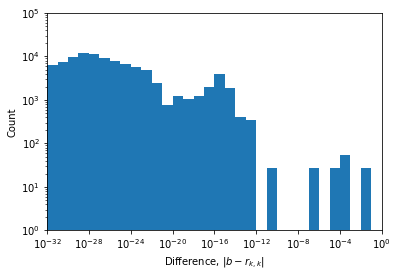

In [11]:
plt.hist(diff_arrs.flat, bins=np.logspace(-32, 0, 33), log=True)
plt.xscale('log')
plt.axis([1e-32, 1, 1e0, 1e5])
plt.xlabel('Difference, $\\left|b - r_{k,k}\\right|$')
plt.ylabel('Count')

Es254 -> Pb206

CRAM
 [  0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   8.472174670172917909e-69   8.852077658113616109e-62
   2.704426087399383059e-55   2.895186901707717194e-49
   1.028879494003222427e-43   1.273798658067114201e-38
   5.700269495718322578e-34   9.940432396061195752e-30
   7.804903945524477686e-26   2.720186744258052677e-22
   4.549740473439914997e-19   4.700051480189379521e-16
   3.121869700597032484e-13   1.082760447846595004e-10
   1.716040727684077449e-08   1.285838247146985600e-06
   3.767681483041823655e-05   3.348803000821385192e-04]
Bateman
 [ 0.                    0.000157026021669309  0.000157026021669198
  0.000157026021669198  0.000157026021669309  0.000157026021669309
  0.000157026021669309  0.000157026021669198  0.0001570260216691

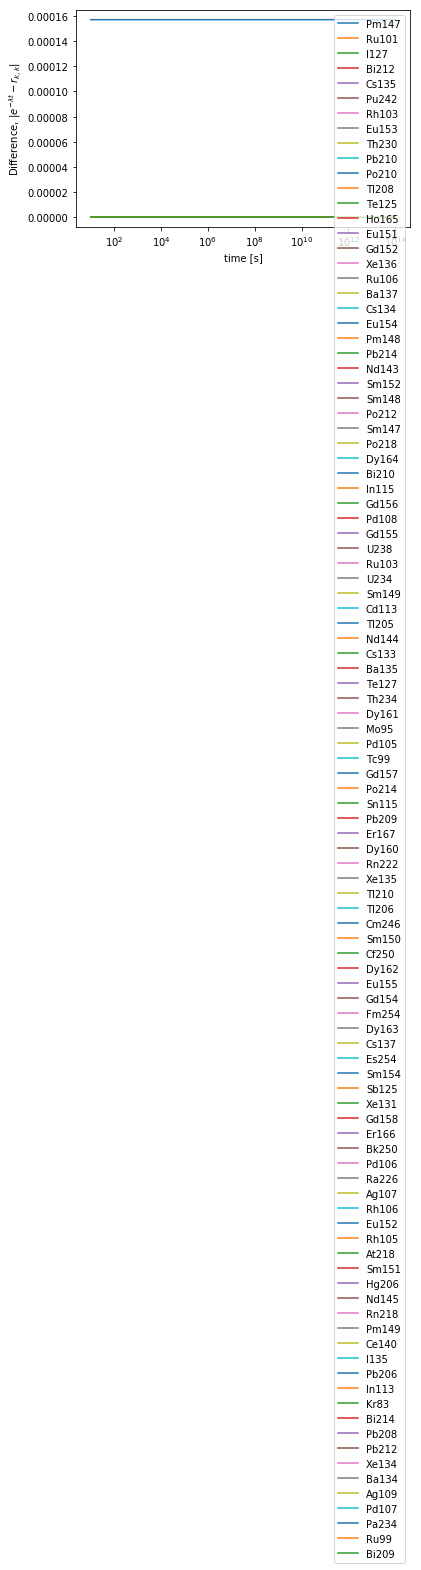

In [34]:
nuc = 'Es254'
ouc = 'Pb206'
print(nuc + ' -> ' + ouc + '\n')
print('CRAM\n', crammeds[nuc][ouc])
print('Bateman\n', batemans[nuc][ouc])
print('Diff\n', batemans[nuc][ouc] - crammeds[nuc][ouc])
bateman_diff_plot(nuc, batemans=batemans, crammeds=crammeds)

In [13]:
#out[2442] += (it->second) * (4.00946745562130117e-03*b58 + -1.82469514198686463e-03*b57*t)
#out[2442] += (it->second) * (-2.13230769230769246e-03*b57 + -2.13230769230769246e-03*b57 + 4.00946745562130117e-03*b58)

In [14]:
2.13230769230769246e-03 * 0.639 / 0.9**2

0.0016821538461538462

In [15]:
data.half_life('Ho148')

2.2

In [16]:
coef = (0.9 - 2.2)**-1 * np.log(2) * (0.7 *0.002) * 2.2 * 0.9**(3-4)
coef

-0.0018246951419868644

In [17]:
t = 10.0
4.00946745562130117e-03 * 2**(-4.54545454545454530e-01*t) + coef * t * 2**(-t / 0.9)

0.0001634500880707525

In [18]:
4.00946745562130117e-03 * 2**(-4.54545454545454530e-01*10.0)

0.00017169930237543563

In [19]:
 2**(-4.54545454545454530e-01*1.0)

0.7297400528407231

In [20]:
2.604502495499387837e-01 / 2.609760820762884737e-001

0.997985131349332

In [21]:
data.branch_ratio('Os179', 'Re179')

1.0

In [22]:
data.branch_ratio('Po210', 'Pb206')

1.0

In [23]:
(1.616374589072180098e-04/ 1.634500880707525565e-004)

0.9889101976944185

In [24]:
kids = data.decay_children('U235')
{k: nucname.name(k) for k in kids}

{360830000: 'Kr83',
 420950000: 'Mo95',
 430990000: 'Tc99',
 441010000: 'Ru101',
 441030000: 'Ru103',
 441060000: 'Ru106',
 451030000: 'Rh103',
 451050000: 'Rh105',
 461050000: 'Pd105',
 461070000: 'Pd107',
 461080000: 'Pd108',
 471090000: 'Ag109',
 481130000: 'Cd113',
 491150000: 'In115',
 511250000: 'Sb125',
 521270000: 'Te127',
 531270000: 'I127',
 531350000: 'I135',
 541310000: 'Xe131',
 541340000: 'Xe134',
 541350000: 'Xe135',
 541360000: 'Xe136',
 551330000: 'Cs133',
 551340000: 'Cs134',
 551350000: 'Cs135',
 551370000: 'Cs137',
 601430000: 'Nd143',
 601450000: 'Nd145',
 611470000: 'Pm147',
 611480000: 'Pm148',
 611480001: 'Pm148M',
 611490000: 'Pm149',
 621470000: 'Sm147',
 621480000: 'Sm148',
 621490000: 'Sm149',
 621500000: 'Sm150',
 621510000: 'Sm151',
 621520000: 'Sm152',
 631510000: 'Eu151',
 631520000: 'Eu152',
 631530000: 'Eu153',
 631540000: 'Eu154',
 631550000: 'Eu155',
 641540000: 'Gd154',
 641550000: 'Gd155',
 641560000: 'Gd156',
 641570000: 'Gd157',
 641580000: 'Gd15

In [25]:
data.half_life('Pb206')

inf

In [26]:
data.half_life('Fr229')

50.2

In [27]:
data.half_life('Ra229')

240.0

In [28]:
data.half_life('Rn225')

279.6

In [29]:
data.half_life('Fr225')

237.0

In [30]:
data.half_life('U238')

1.409993568e+17

In [31]:
data.branch_ratio('Ra225', 'Ac225')

1.0

In [32]:
nucname.id('Es254')

992540000